In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
from pandas_datareader.data import DataReader

In [8]:
from datetime import datetime

In [9]:
from __future__ import division

In [10]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [11]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [12]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [15]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,111.450992,112.304960,110.789405,111.617024,3.390969e+07,110.609543
std,12.789938,12.772230,12.867113,12.873033,1.555199e+07,13.339920
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,101.987502,103.734998,101.832499,102.314999,2.505722e+07,100.806859
50%,109.914997,110.835003,109.175003,109.989998,2.942635e+07,109.390729
75%,116.802502,117.560000,116.347502,117.000002,3.666998e+07,116.228740
max,142.110001,142.800003,140.610001,141.460007,1.146021e+08,141.460007


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-03-24 to 2017-03-23
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


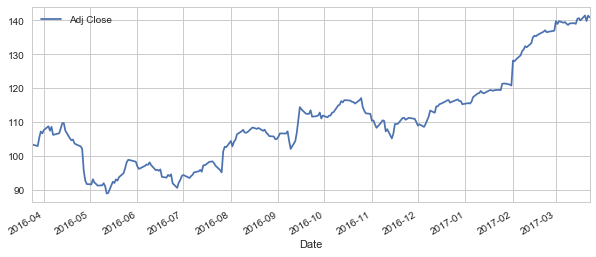

In [17]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

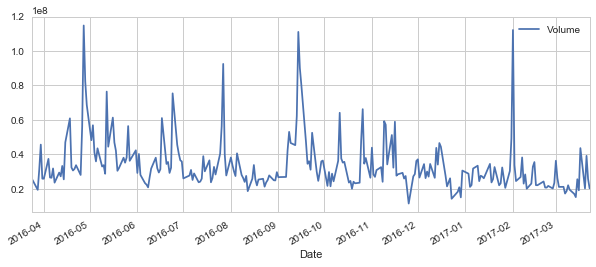

In [19]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for {} days".format(ma)
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


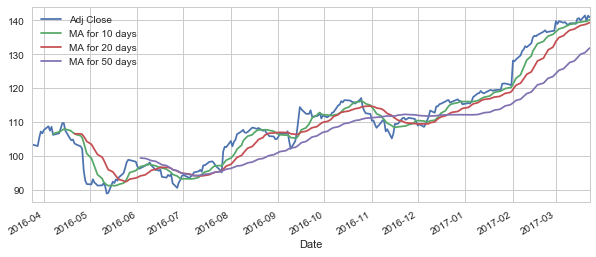

In [23]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

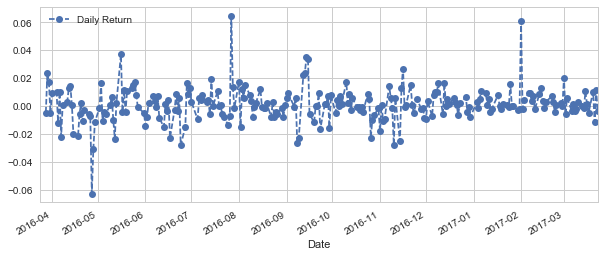

In [24]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--',marker='o')

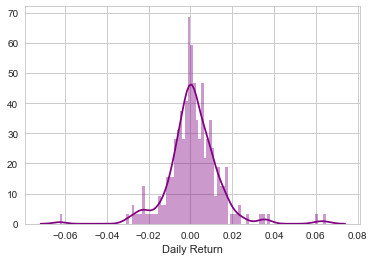

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

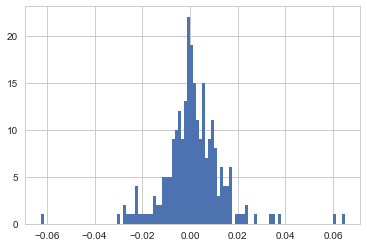

In [26]:
AAPL['Daily Return'].hist(bins=100)

In [27]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [28]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-03-24,103.482354,582.950012,735.299988,52.820794
2016-03-28,103.012296,579.869995,733.530029,52.167966
2016-03-29,105.450744,593.859985,744.770020,53.307981
2016-03-30,107.291821,598.690002,750.530029,53.639268
2016-03-31,106.733621,593.640015,744.950012,53.814656


In [29]:
tech_rets = closing_df.pct_change()

In [30]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-03-24,NaN,NaN,NaN,NaN
2016-03-28,-0.004542,-0.005284,-0.002407,-0.012359
2016-03-29,0.023671,0.024126,0.015323,0.021853
2016-03-30,0.017459,0.008133,0.007734,0.006215
2016-03-31,-0.005203,-0.008435,-0.007435,0.003270


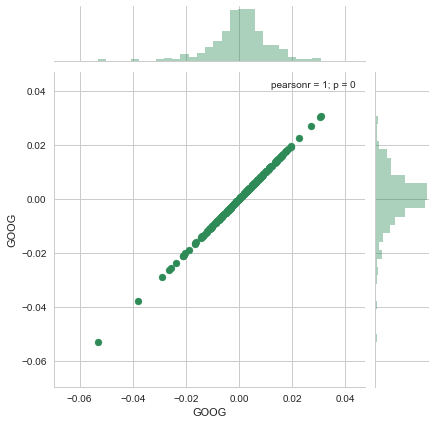

In [31]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

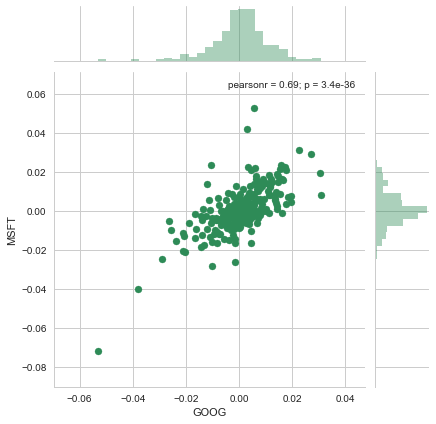

In [32]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

In [33]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-03-24,NaN,NaN,NaN,NaN
2016-03-28,-0.004542,-0.005284,-0.002407,-0.012359
2016-03-29,0.023671,0.024126,0.015323,0.021853
2016-03-30,0.017459,0.008133,0.007734,0.006215
2016-03-31,-0.005203,-0.008435,-0.007435,0.003270


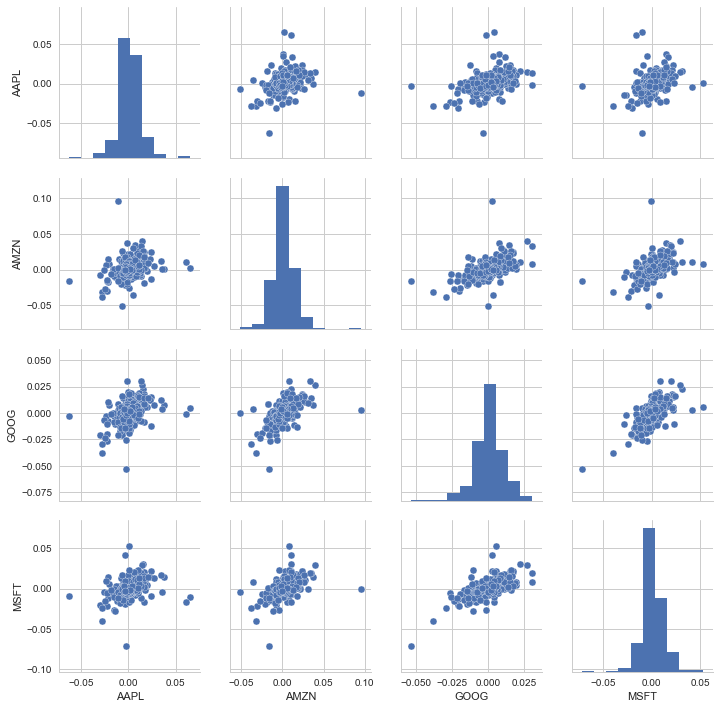

In [34]:
sns.pairplot(tech_rets.dropna())

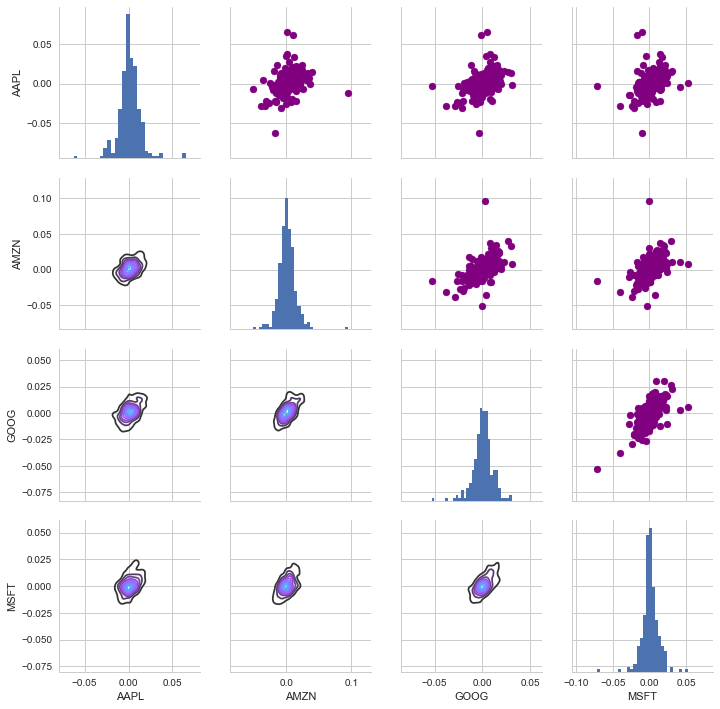

In [35]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

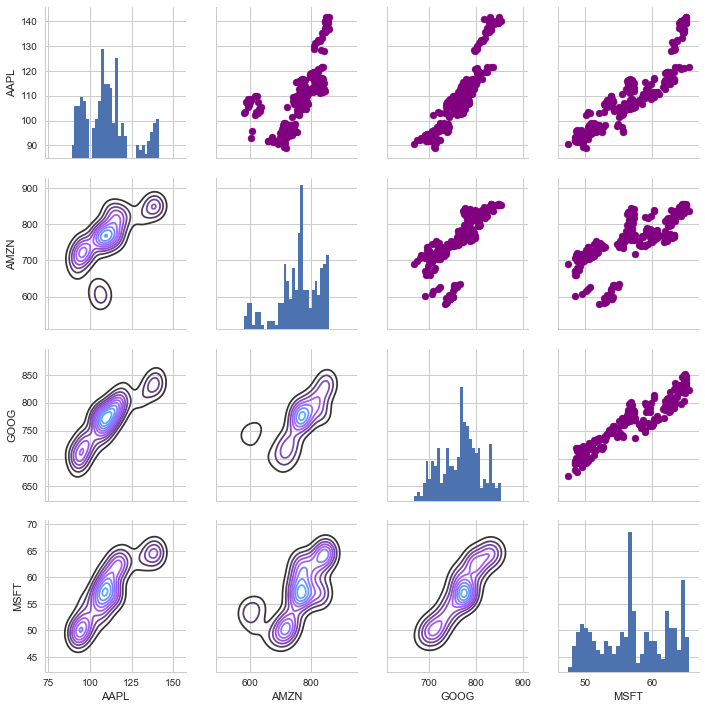

In [36]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [39]:
from seaborn.linearmodels import corrplot

C:\Users\Work\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Work\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


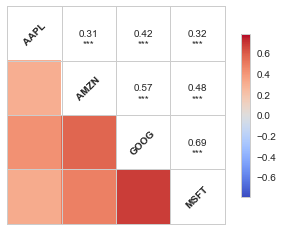

In [40]:
corrplot(tech_rets.dropna(), annot=True)

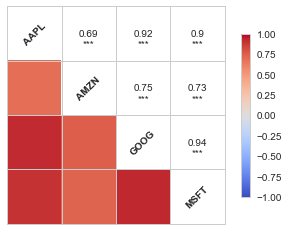

In [41]:
corrplot(closing_df, annot=True)

In [42]:
rets = tech_rets.dropna()


In [43]:
area = np.pi*20

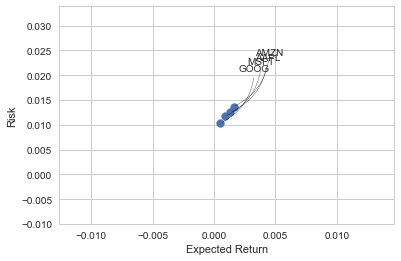

In [47]:
plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle ='-', connectionstyle = 'arc3,rad=-0.3'))

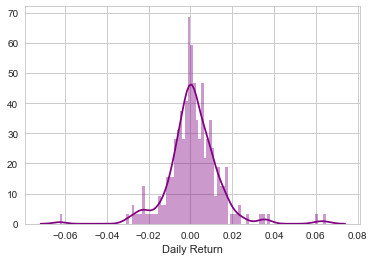

In [48]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color='purple')

In [49]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-03-28,-0.004542,-0.005284,-0.002407,-0.012359
2016-03-29,0.023671,0.024126,0.015323,0.021853
2016-03-30,0.017459,0.008133,0.007734,0.006215
2016-03-31,-0.005203,-0.008435,-0.007435,0.003270
2016-04-01,0.009175,0.008187,0.006658,0.006156


In [50]:
rets['AAPL'].quantile(0.05)

-0.019063353969184738

In [51]:
# Monte Carlo

In [52]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [53]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [54]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-03-24,732.010010,737.747009,731.000000,735.299988,1594900,735.299988
2016-03-28,736.789978,738.989990,732.500000,733.530029,1301300,733.530029
2016-03-29,734.590027,747.250000,728.760010,744.770020,1903800,744.770020
2016-03-30,750.099976,757.880005,748.739990,750.530029,1782400,750.530029
2016-03-31,749.250000,750.849976,740.940002,744.950012,1718800,744.950012


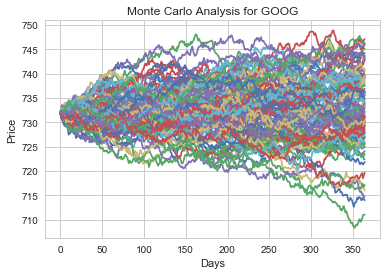

In [56]:
start_price = 732.01

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for GOOG')

In [57]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

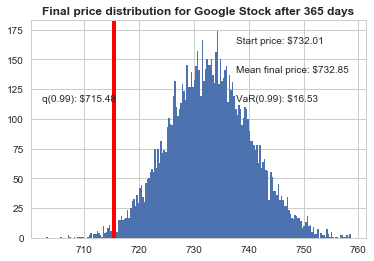

In [59]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6,0.8, s='Start price: $%.2f' %start_price)

plt.figtext(0.6,0.7, 'Mean final price: $%.2f' % simulations.mean())

plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u'Final price distribution for Google Stock after %s days' % days,weight='bold')